## Importing Libraries 

In [ ]:
import pandas as pd
import tensorflow as tf
import folderstats
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

## Downloading Project DataSet

In [ ]:
#!git clone https://github.com/Franck-Dernoncourt/pubmed-rct # Downloading DataSet

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.


In [ ]:
ls pubmed-rct/

PubMed_200k_RCT/
PubMed_200k_RCT_numbers_replaced_with_at_sign/
PubMed_20k_RCT/
PubMed_20k_RCT_numbers_replaced_with_at_sign/
README.md


## Project Details

In [ ]:
from IPython.display import Markdown, display

display(Markdown('pubmed-rct/README.md'))


# PubMed 200k RCT dataset

The PubMed 200k RCT dataset is described in *Franck Dernoncourt, Ji Young Lee. [PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts](https://arxiv.org/abs/1710.06071). International Joint Conference on Natural Language Processing (IJCNLP). 2017.*

Abstract:

> PubMed 200k RCT is new dataset based on PubMed for sequential sentence classification. The dataset consists of approximately 200,000 abstracts of randomized controlled trials, totaling 2.3 million sentences. Each sentence of each abstract is labeled with their role in the abstract using one of the following classes: background, objective, method, result, or conclusion. The purpose of releasing this dataset is twofold. First, the majority of datasets for sequential short-text classification (i.e., classification of short texts that appear in sequences) are small: we hope that releasing a new large dataset will help develop more accurate algorithms for this task. Second, from an application perspective, researchers need better tools to efficiently skim through the literature. Automatically classifying each sentence in an abstract would help researchers read abstracts more efficiently, especially in fields where abstracts may be long, such as the medical field.


Some miscellaneous information:
- PubMed 20k is a subset of PubMed 200k. I.e., any abstract present in PubMed 20k is also present in PubMed 200k. 
- `PubMed_200k_RCT` is the same as `PubMed_200k_RCT_numbers_replaced_with_at_sign`, except that in the latter all numbers had been replaced by `@`. (same for `PubMed_20k_RCT` vs. `PubMed_20k_RCT_numbers_replaced_with_at_sign`).
- Since Github file size limit is [100 MiB](https://stackoverflow.com/a/43098961/395857), we had to compress `PubMed_200k_RCT\train.7z` and `PubMed_200k_RCT_numbers_replaced_with_at_sign\train.zip`. To uncompress `train.7z`, you may use [7-Zip](http://www.7-zip.org/download.html) on Windows,  [Keka](http://www.kekaosx.com/en/) on Mac OS X, or [p7zip](http://p7zip.sourceforge.net/) on Linux.

You are most welcome to share with us your analyses or work using this dataset!

## Projects using the PubMed 200k RCT dataset

- Titipat Achakulvisut, Chandra Bhagavatula, Daniel E Acuna, Konrad P Kording. [Claim Extraction for Scientific Publications](https://github.com/titipata/detecting-scientific-claim). 2018


In [ ]:
folderstats.folderstats('pubmed-rct/').sort_values('size', ascending=False).head(6)

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
59,1,pubmed-rct/,,None,449322483,2022-02-01 16:49:21,2022-02-01 16:49:21,2022-02-01 16:49:21,True,39.0,0,0,501
54,15,pubmed-rct/.git,.git,None,185711302,2022-02-01 16:49:21,2022-02-01 16:49:21,2022-02-01 16:49:21,True,26.0,1,1,501
18,17,pubmed-rct/.git/objects,objects,None,185683049,2022-02-01 16:49:15,2022-02-01 16:49:14,2022-02-01 16:49:14,True,2.0,2,15,501
16,18,pubmed-rct/.git/objects/pack,pack,None,185682857,2022-02-01 16:49:21,2022-02-01 16:49:20,2022-02-01 16:49:20,True,2.0,3,17,501
15,20,pubmed-rct/.git/objects/pack/pack-a718c4f14679...,pack-a718c4f14679a5db0d6080d1544682fb14e154c4,pack,185680861,2022-02-02 18:33:42,2022-02-01 16:49:20,2022-02-01 16:49:20,False,NaN,3,18,501
8,7,pubmed-rct/PubMed_200k_RCT_numbers_replaced_wi...,PubMed_200k_RCT_numbers_replaced_with_at_sign,None,109467967,2022-02-01 16:49:21,2022-02-01 16:49:21,2022-02-01 16:49:21,True,3.0,1,1,501


In [ ]:
ls pubmed-rct/PubMed_20k_RCT/

dev.txt    test.txt   train.txt


In [ ]:
data_dir = 'pubmed-rct/PubMed_20k_RCT/'


In [ ]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT/dev.txt',
 'pubmed-rct/PubMed_20k_RCT/train.txt',
 'pubmed-rct/PubMed_20k_RCT/test.txt']

In [ ]:
data_dir_1 =  'pubmed-rct/PubMed_20k_RCT/train.txt'
data_dir_1_test =  'pubmed-rct/PubMed_20k_RCT/test.txt'
data_dir_2 =  'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt'
data_dir_2_test =  'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt'

In [ ]:
def read_lines(filepath):
    with open(filepath) as f:
        return f.readlines()

In [ ]:
read_lines(data_dir_1)[:10] 


['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of 125 patients with primary knee OA were randomized 1:1 ; 63 received 7.5 mg/day of prednisolone and 62 received placebo for 6 weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( 0-100 mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and 6-min walk distance ( 6MWD ) .\n',
 'METHODS\tSerum levels of interleukin 1 ( IL-1 ) , IL-6 , tumor necrosis factor ( TNF )

In [ ]:
read_lines(data_dir_2)[:10] 

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [15]:
def preprocess_text(filename):
    """
    This function is used to preprocess text from the document and used to assign different sub heading to each of their headers
    """
    
    df_dict = {}
    lines_list =[]
    abstract_lines = ''
    k = 0
    input_lines = read_lines(filename)

    for line in input_lines:
        if line.startswith('###'):
            abstract_id = line 
            abstract_lines = ''
        elif line.isspace():
            abstract_line_split = abstract_lines.splitlines()

            for newlinenumber, newline in enumerate(abstract_line_split):
                line_data = {}
                target_text_split = newline.split('\t')
                line_data['target'] = target_text_split[0]
                line_data['text'] = target_text_split[1]
                line_data['line_number'] = newlinenumber
                line_data['total_lines'] = len(abstract_line_split) - 1
                lines_list.append(line_data)
        else:
            abstract_lines += line

    return lines_list

In [16]:
training_data  =  pd.DataFrame(preprocess_text(data_dir_1))
training_data_without_numbers  =  pd.DataFrame(preprocess_text(data_dir_2))

In [17]:
test_data  =  pd.DataFrame(preprocess_text(data_dir_1_test))
test_data_without_numbers  =  pd.DataFrame(preprocess_text(data_dir_2_test))

### Disribution of Document Parts

Text(0.5, 1.0, 'Number of Samples')

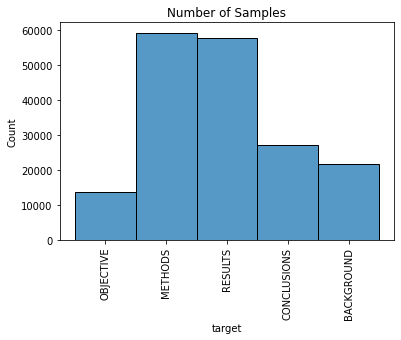

In [18]:
import matplotlib.pyplot as plt
sns.histplot(training_data['target'])
plt.xticks(rotation=90)
plt.title('Number of Samples')

> Splitting Datasets into training and Validation Parts

In [19]:
training_dataset, validation_dataset = train_test_split(training_data)


> Encoding Document Label (Targets) & Seperating Features

In [20]:

ohe = OneHotEncoder(sparse=False)
training_labels   = ohe.fit_transform(training_data['target'].to_numpy().reshape(-1,1))  # Training Labels Using One Hot Encoding
training_dataset = training_data[['text']] # Training Features Seperation


lb_encoder = LabelEncoder()
training_labels_encoder   = lb_encoder.fit_transform(training_data['target'].to_numpy().reshape(-1,1)) # Training Labels Using Label Encoder
training_dataset = training_data[['text']] # Training Features Seperation


test_labels   = lb_encoder.transform(test_data['target'].to_numpy().reshape(-1,1)) # Test Labels Using Label Encoder
test_dataset = test_data[['text']] # Test Features Seperation



    

/Users/yaqoobao/Downloads/venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yaqoobao/Downloads/venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Baseline Model Using MultinomialNB & TextVectorizer

In [21]:
def test_set_preprocessing(test_data):
    test_data['target'] = ohe.transform(test_data['target'].to_numpy().reshape(-1,1))

In [22]:
Tfdf_model  = Pipeline([
    ('TextVectorizer', TfidfVectorizer()), 
    ('clf', MultinomialNB())
])

Tfdf_model.fit(training_dataset['text'], training_labels_encoder )

Pipeline(steps=[('TextVectorizer', TfidfVectorizer()),
                ('clf', MultinomialNB())])

In [23]:
Tfdf_model.score(test_dataset['text'], test_labels)

0.7265637962502074

In [74]:
from YaqoobFunctions import performance_measure_classification

In [75]:
performance_measure_classification(test_dataset['text'], test_labels, Tfdf_model, 'MultinomalNB Baseline Model' )

,accuracy,cohen_kappa_score,recall,precision,f1
MultinomalNB Baseline Model,0.726564,0.619929,0.726564,0.798564,0.753738


# DEEP LEARNING 

In [91]:
len_of_tokens = [len(i) for i in (training_data['text'].str.split())]
    

In [97]:
'Each sentence has an average of {} words'.format(round(sum(len_of_tokens)/ len(len_of_tokens)))

'Each sentence has an average of 26 words'

/Users/yaqoobao/Downloads/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of number of words per sentence')

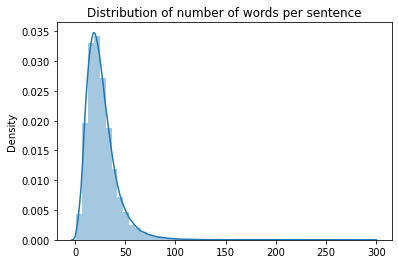

In [101]:
sns.distplot(len_of_tokens)
plt.title('Distribution of number of words per sentence')